In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding = 'latin1')

## Time Series Index

In [3]:
# Convert 'Date' to Datetime and set as index
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df.set_index('Creation Date',inplace = True)


In [4]:
df.index

DatetimeIndex(['2023-12-03', '2023-12-03', '2023-12-03', '2023-12-04',
               '2023-12-04', '2023-12-05', '2023-12-05', '2023-12-05',
               '2023-12-06', '2023-12-06',
               ...
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09'],
              dtype='datetime64[ns]', name='Creation Date', length=28623, freq=None)

In [5]:
df.loc['2025-1']['Revenue']


Creation Date
2025-01-01     39900
2025-01-01     39900
2025-01-01     39900
2025-01-01    478800
2025-01-01     39900
               ...  
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
Name: Revenue, Length: 2224, dtype: int64

In [6]:
df = df[df['Revenue'] != 0]
df = df.groupby(df.index).sum()

In [7]:
#Resampling to Monthly Frequancy and Calculate the mean closing price
df['Revenue'].resample('M').mean()

/tmp/ipykernel_41216/3542015835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

## EDA

In [8]:
# Filter and make a copy to avoid SettingWithCopyWarning
df = df[df['Sales Method'] != 'Bundle'].copy()
df.loc['2025']['Sales Method'].unique()

array(['CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCod

<Axes: xlabel='Creation Date'>

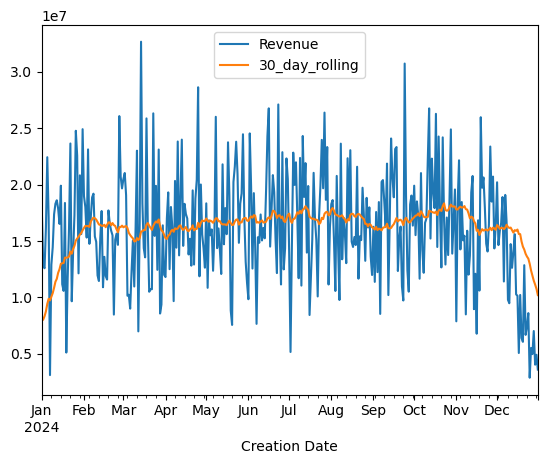

In [9]:
df = df[df['Revenue'] > 0] 
# Now safely calculate rolling average
df['30_day_rolling'] = df['Revenue'].rolling(window=30).mean()

# Plot for 2024
df[['Revenue', '30_day_rolling']].loc['2024'].plot()



In [10]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday
df['is_weekend'] = df.index.weekday > 4 # Check for weekend

df.head()

,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,OrderID/RegCode,Transaction Code,...,Internet Package,Cancellation Date,Sales Method,30_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Creation Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,SIM1000000952SIM1000003875SIM1000004226,0,109,04.Hai Phong06.Khanh Hoa10.Vung Tau,BTENBHBTN,OBBIBB,HBHDNISLA,13.Tay Nguyen - Mien Trung01.Ha Noi10.Vung Tau,SIMORDER952SIMORDER3875SIMORDER4226,0,...,Giga F1FTTH - Super500Sky,0,ExtraCodeCode,NaN,2023,12,3,Sunday,6,True
2023-12-04,SIM1000002839SIM1000003079,0,54,07.Ho Chi Minh06.Khanh Hoa,DLKHCM_03,OBBCBB,TGGHNI_02,02.Quang Ninh10.Vung Tau,SIMORDER2839SIMORDER3079,0,...,Meta F2FTTH - Super500,0,CodeCode,NaN,2023,12,4,Monday,0,False
2023-12-05,SIM1000001125SIM1000002091SIM1000004750,2,122,05.Da Nang05.Da Nang09.Binh Duong,CTOHCM_02HBH,IBBIBB,HPGHNI_05DKG,04.Hai Phong02.Quang Ninh08.Dong Nai,SIMORDER1125SIMORDER2091SIMORDER4750,0,...,Meta F2MetaGiga F1,0,CodeCodeCode,NaN,2023,12,5,Tuesday,1,False
2023-12-06,SIM1000000788SIM1000000842SIM1000001051SIM1000...,1,204,15.Tay Nam Bo03.Hai Duong14.Dong Nam Bo11.Tay ...,THAHYNHNI_03DKG,IBBCBBCBB,HNI_05HNI_02BTNBTN,12.Dong Bac Bo06.Khanh Hoa12.Dong Bac Bo10.Vun...,SIMORDER788SIMORDER842SIMORDER1051SIMORDER1774,0,...,SkyFTTH - Super500Giga - MultiFTTH - Super400,0,ExtraCodeCodeCode,NaN,2023,12,6,Wednesday,2,False
2023-12-08,SIM1000000782SIM1000001239SIM1000002650SIM1000...,4,183,09.Binh Duong04.Hai Phong14.Dong Nam Bo11.Tay ...,HCM_01HNMQTITNNPTO,OBBIBBIBB,VLGBTNLDGTBHHCM_06,14.Dong Nam Bo08.Dong Nai02.Quang Ninh03.Hai D...,SIMORDER782SIMORDER1239SIMORDER2650SIMORDER294...,0,...,Sky F3Sky F1FTTH - Super250Giga F1Sky F2,0,CodeCodeCodeExtraCode,NaN,2023,12,8,Friday,4,False


In [11]:
# Feature Enegineering - Lagged values
df['Revenue_lag1'] = df['Revenue'].shift(1)
df['Revenue_lag2'] = df['Revenue'].shift(2)

## Seasonal Decomposition

In [12]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df['Revenue'].resample('M').mean()


/tmp/ipykernel_41216/1463569539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

/tmp/ipykernel_41216/2711891604.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Revenue'].resample('M').mean())


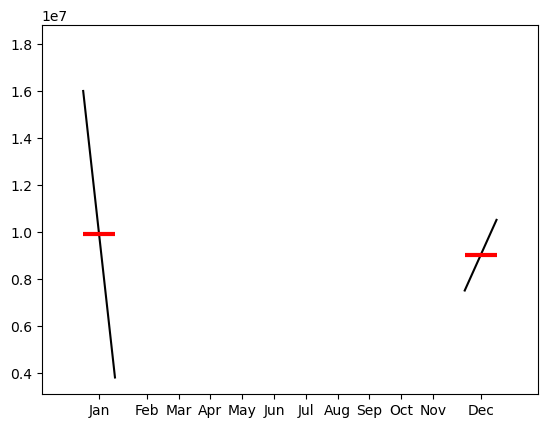

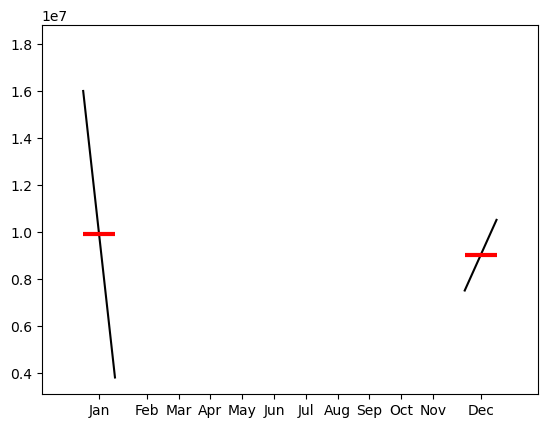

In [14]:
month_plot(df['Revenue'].resample('M').mean())

Due to the limited data range from December 2023 to January 2025, there is not enough information to identify or analyze seasonal patterns across months

<Axes: xlabel='Creation Date'>

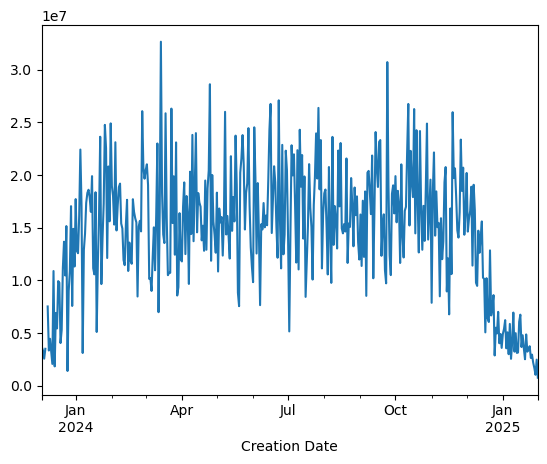

In [15]:
df['Revenue'].resample('D').mean().plot()


In [16]:
df.isnull().sum()


Contract_ID            0
Gender                 0
Age                    0
Region                 0
Managing Branch        0
Sales Unit             0
Selling branch         0
Sales Region           0
OrderID/RegCode        0
Transaction Code       0
Type                   0
FG Package Command     0
Payment Month          0
Revenue                0
Sales Channel          0
Status FGame           0
Active Date            0
Service Start Date     0
Service End Date       0
Internet Package       0
Cancellation Date      0
Sales Method           0
30_day_rolling        29
year                   0
month                  0
day                    0
weekday                0
weekday_numeric        0
is_weekend             0
Revenue_lag1           1
Revenue_lag2           2
dtype: int64

In [17]:
df['Revenue'] = df['Revenue'].replace(0, np.nan)
df['Revenue'] = df['Revenue'].interpolate()


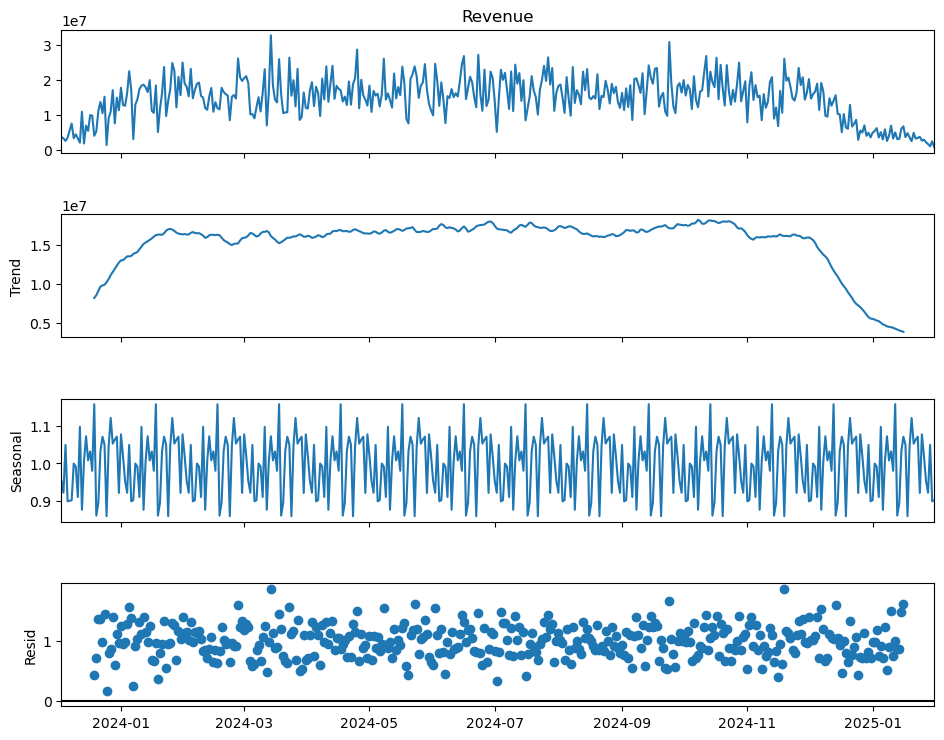

In [18]:
decomposition = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


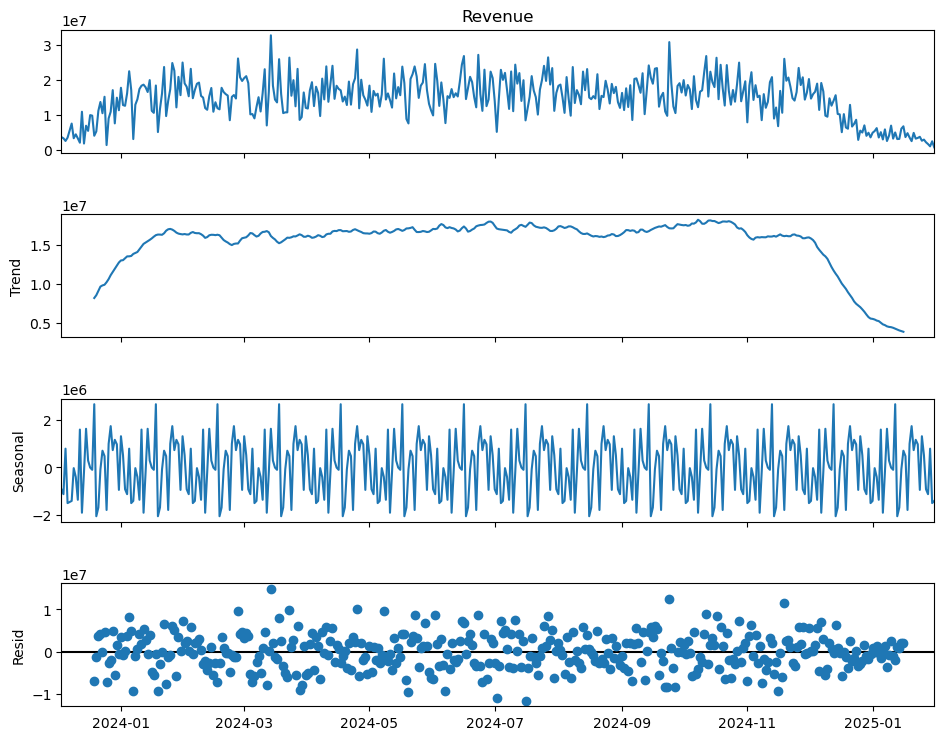

In [19]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


Multiplicative fits better:
- Cleaner seasonal pattern in the top figure (values around 1, not wildly swinging).
- Smaller residuals (closer to 1) → means the model explained more of the variation.
- Additive model's residuals are larger, showing it didn't explain the data as well.

## Auto Correlation (ACF)

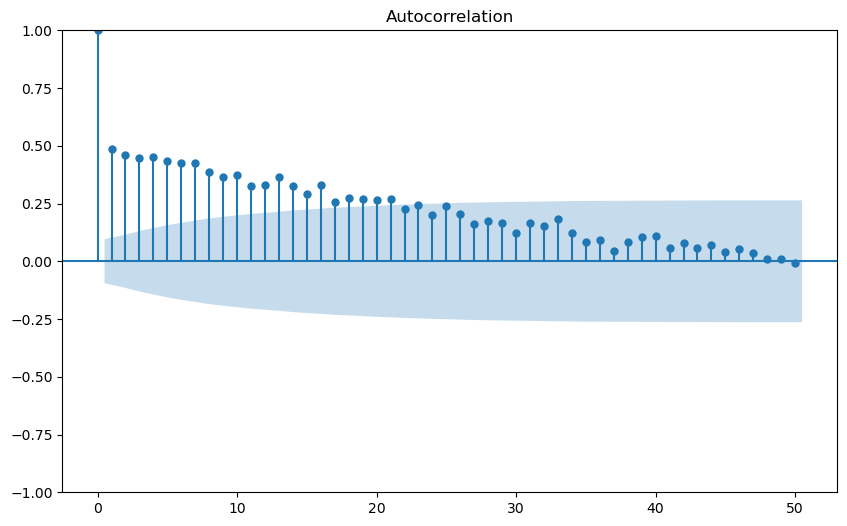

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Revenue'], lags = 50 ,ax = ax)
plt.show()

## Forecasting - Prophet

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and clean
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df = df[df['Revenue'] > 0]
df = df.groupby('Creation Date')['Revenue'].sum().reset_index()
df.columns = ['ds', 'y']

# Split
train = df[df['ds'] < '2024-11-01']
test  = df[(df['ds'] >= '2024-11-01') & (df['ds'] <= '2025-01-31')]


holidays = pd.DataFrame({
  'holiday': 'year_end',
  'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
  'lower_window': 0,
  'upper_window': 2,
})

model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

22:54:55 - cmdstanpy - INFO - Chain [1] start processing
22:54:55 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Merge forecast with test set
forecast_eval = forecast[['ds', 'yhat']].merge(test, on='ds')

# Evaluation
mae = mean_absolute_error(forecast_eval['y'], forecast_eval['yhat'])
rmse = mean_squared_error(forecast_eval['y'], forecast_eval['yhat'], squared=False)
mape = (abs((forecast_eval['y'] - forecast_eval['yhat']) / forecast_eval['y'])).mean() * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 15897349.11
RMSE: 19249938.09
MAPE: 427.29%


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


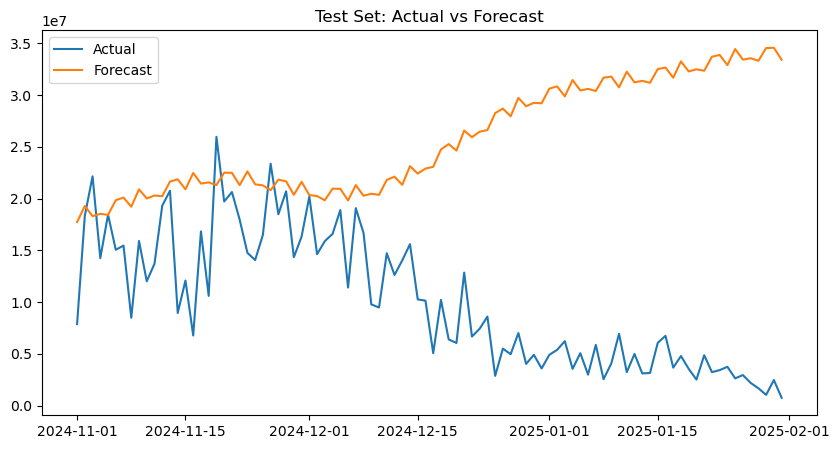

In [10]:
plt.figure(figsize=(10,5))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(forecast_eval['ds'], forecast_eval['yhat'], label='Forecast')
plt.title("Test Set: Actual vs Forecast")
plt.legend()
plt.show()


22:55:05 - cmdstanpy - INFO - Chain [1] start processing
22:55:05 - cmdstanpy - INFO - Chain [1] done processing
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


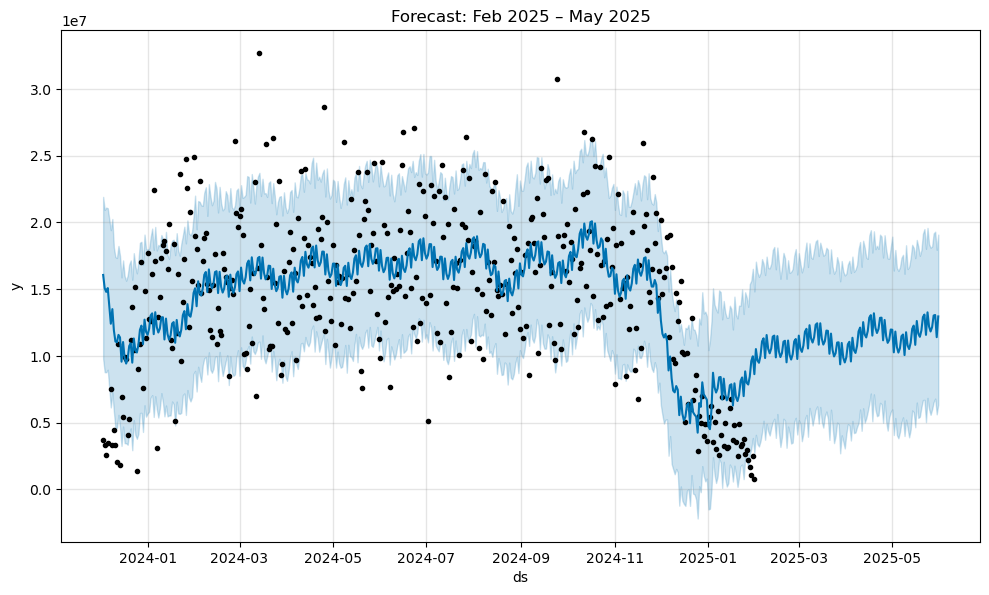

In [11]:
# Retrain full model
model_final = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
model_final.fit(df)

# Forecast Feb 2025 to May 2025
future_final = model_final.make_future_dataframe(periods=120, freq='D')
forecast_final = model_final.predict(future_final)

fig = model_final.plot(forecast_final)
plt.title("Forecast: Feb 2025 – May 2025")
plt.show()


In [18]:
# Predict on entire training set (fitted period)
fitted = model_final.predict(df[['ds']])

# Merge actual and predicted
fitted_eval = df[['ds', 'y']].merge(fitted[['ds', 'yhat']], on='ds')

# Evaluate fit quality
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(fitted_eval['y'], fitted_eval['yhat'])
rmse = mean_squared_error(fitted_eval['y'], fitted_eval['yhat'], squared=False)
mape = (abs((fitted_eval['y'] - fitted_eval['yhat']) / fitted_eval['y'])).mean() * 100

print("=== Fit Evaluation (on training data) ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")


=== Fit Evaluation (on training data) ===
MAE  : 3891460.80
RMSE : 4872365.68
MAPE : 46.00%


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Forecasting - LSTM

In [24]:
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# --------------------------
# Step 1: Load and preprocess data
# --------------------------
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df = df.sort_values("Creation Date")

# Normalize revenue
scaler = StandardScaler()
df["Revenue_scaled"] = scaler.fit_transform(df[["Revenue"]])

# --------------------------
# Step 2: Create sliding window dataset
# --------------------------
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X = []
        self.y = []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

data_series = df["Revenue_scaled"].values
dataset = RevenueDataset(data_series, input_len=30, pred_len=7)

train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# --------------------------
# Step 3: Define LSTM model
# --------------------------
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [B, T, H]
        out = out[:, -1, :]           # Take last output
        out = self.linear(out)        # Predict next values
        return out

model = LSTMForecast()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --------------------------
# Step 4: Train the model
# --------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_loss/len(train_loader):.4f}")

# --------------------------
# Step 5: Evaluate and visualize
# --------------------------
model.eval()
X_sample, y_true = next(iter(val_loader))
X_sample = X_sample.to(device)
with torch.no_grad():
    y_pred = model(X_sample).cpu().numpy()

# Inverse scale to original revenue
y_pred_orig = scaler.inverse_transform(y_pred)
y_true_orig = scaler.inverse_transform(y_true.numpy())



Epoch 1/100 - Train Loss: 0.9556
Epoch 2/100 - Train Loss: 0.8995
Epoch 3/100 - Train Loss: 0.7672
Epoch 4/100 - Train Loss: 0.6761
Epoch 5/100 - Train Loss: 0.6102
Epoch 6/100 - Train Loss: 0.5877
Epoch 7/100 - Train Loss: 0.5808
Epoch 8/100 - Train Loss: 0.5703
Epoch 9/100 - Train Loss: 0.5727
Epoch 10/100 - Train Loss: 0.5729
Epoch 11/100 - Train Loss: 0.5669
Epoch 12/100 - Train Loss: 0.5614
Epoch 13/100 - Train Loss: 0.5655
Epoch 14/100 - Train Loss: 0.5594
Epoch 15/100 - Train Loss: 0.5615
Epoch 16/100 - Train Loss: 0.5613
Epoch 17/100 - Train Loss: 0.5527
Epoch 18/100 - Train Loss: 0.5571
Epoch 19/100 - Train Loss: 0.5529
Epoch 20/100 - Train Loss: 0.5560
Epoch 21/100 - Train Loss: 0.5521
Epoch 22/100 - Train Loss: 0.5455
Epoch 23/100 - Train Loss: 0.5444
Epoch 24/100 - Train Loss: 0.5386
Epoch 25/100 - Train Loss: 0.5394
Epoch 26/100 - Train Loss: 0.5315
Epoch 27/100 - Train Loss: 0.5310
Epoch 28/100 - Train Loss: 0.5262
Epoch 29/100 - Train Loss: 0.5252
Epoch 30/100 - Train Lo

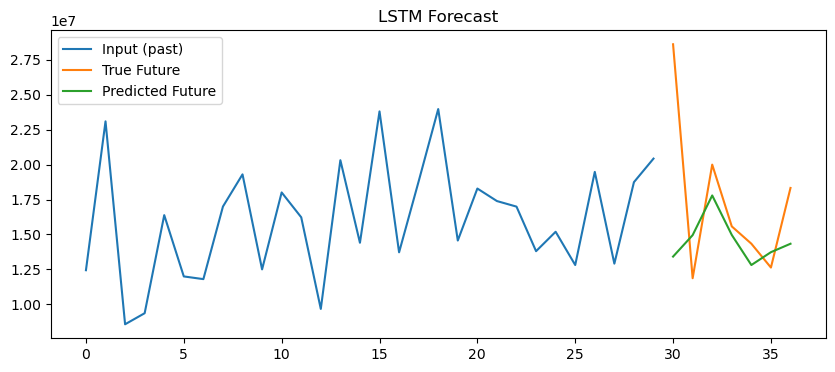

In [26]:
# Plot first sample
plt.figure(figsize=(10, 4))
plt.plot(range(30), scaler.inverse_transform(X_sample[0].cpu().numpy()).flatten(), label="Input (past)")
plt.plot(range(30, 37), y_true_orig[0], label="True Future")
plt.plot(range(30, 37), y_pred_orig[0], label="Predicted Future")
plt.title("LSTM Forecast")
plt.legend()
plt.show()

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid divide-by-zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

# Flatten to compare all values across all batches
y_pred_all = y_pred_orig.flatten()
y_true_all = y_true_orig.flatten()

# MAE
mae = mean_absolute_error(y_true_all, y_pred_all)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))

# MAPE
mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

# Show results
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE:  3561734.25
RMSE: 4469956.00
MAPE: 23.89%


Epoch 1/100 - Train Loss: 0.7005
Epoch 2/100 - Train Loss: 0.6292
Epoch 3/100 - Train Loss: 0.6093
Epoch 4/100 - Train Loss: 0.6013
Epoch 5/100 - Train Loss: 0.6000
Epoch 6/100 - Train Loss: 0.6048
Epoch 7/100 - Train Loss: 0.6047
Epoch 8/100 - Train Loss: 0.6075
Epoch 9/100 - Train Loss: 0.6041
Epoch 10/100 - Train Loss: 0.6029
Epoch 11/100 - Train Loss: 0.6013
Epoch 12/100 - Train Loss: 0.5984
Epoch 13/100 - Train Loss: 0.6003
Epoch 14/100 - Train Loss: 0.6034
Epoch 15/100 - Train Loss: 0.6011
Epoch 16/100 - Train Loss: 0.6004
Epoch 17/100 - Train Loss: 0.5927
Epoch 18/100 - Train Loss: 0.6028
Epoch 19/100 - Train Loss: 0.5996
Epoch 20/100 - Train Loss: 0.6047
Epoch 21/100 - Train Loss: 0.6002
Epoch 22/100 - Train Loss: 0.5972
Epoch 23/100 - Train Loss: 0.6011
Epoch 24/100 - Train Loss: 0.6027
Epoch 25/100 - Train Loss: 0.6008
Epoch 26/100 - Train Loss: 0.5943
Epoch 27/100 - Train Loss: 0.6027
Epoch 28/100 - Train Loss: 0.6021
Epoch 29/100 - Train Loss: 0.5953
Epoch 30/100 - Train Lo

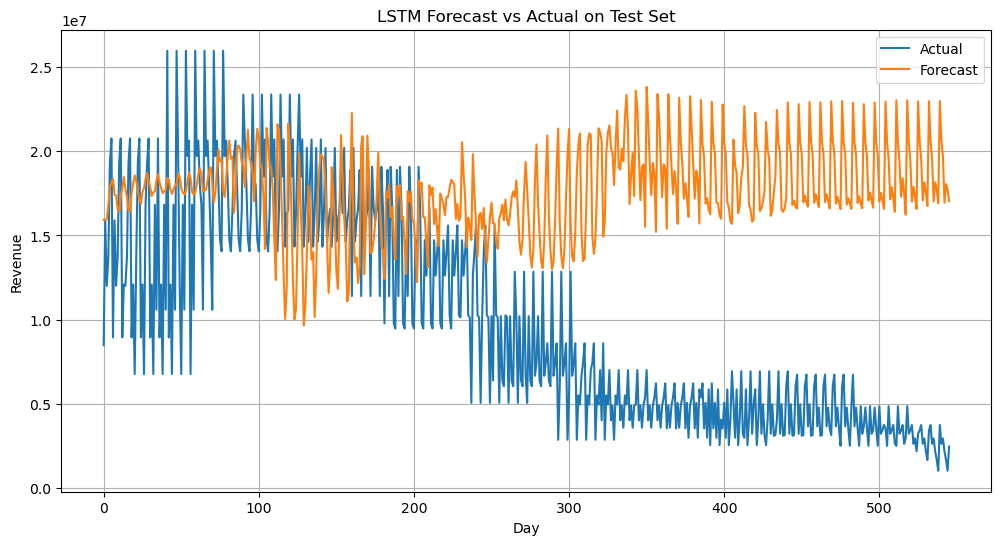

MAE: 9133706.00
RMSE: 10745174.00
MAPE: 200.78%


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --------------------------
# Step 1: Load and preprocess data
# --------------------------
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df = df.sort_values("Creation Date")

# Normalize revenue
scaler = StandardScaler()
df["Revenue_scaled"] = scaler.fit_transform(df[["Revenue"]])

# Create time series
data_series = df["Revenue_scaled"].values

# --------------------------
# Step 2: Create Dataset Class with Sliding Window
# --------------------------
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X = []
        self.y = []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# --------------------------
# Step 3: Split into Train and Test based on time
# --------------------------
split_idx = int(len(data_series) * 0.8)
train_series = data_series[:split_idx]
test_series = data_series[split_idx - 30:]  # need overlap

train_dataset = RevenueDataset(train_series, input_len=30, pred_len=7)
test_dataset = RevenueDataset(test_series, input_len=30, pred_len=7)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# --------------------------
# Step 4: Define LSTM model
# --------------------------
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [B, T, H]
        out = out[:, -1, :]           # Take last output
        out = self.linear(out)        # Predict next values
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# --------------------------
# Step 5: Train the model
# --------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_loss/len(train_loader):.4f}")

# --------------------------
# Step 6: Evaluate on Test Set
# --------------------------
model.eval()
predictions = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        pred = model(X_batch).cpu().numpy()
        true = y_batch.numpy()

        predictions.append(pred[0])
        targets.append(true[0])

predictions = np.array(predictions)
targets = np.array(targets)

# Flatten and inverse scale
y_pred_flat = scaler.inverse_transform(predictions.flatten().reshape(-1, 1)).flatten()
y_true_flat = scaler.inverse_transform(targets.flatten().reshape(-1, 1)).flatten()

# --------------------------
# Step 7: Visualize
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(y_true_flat, label='Actual')
plt.plot(y_pred_flat, label='Forecast')
plt.title('LSTM Forecast vs Actual on Test Set')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Step 8: Evaluate Metrics
# --------------------------
mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = mean_squared_error(y_true_flat, y_pred_flat, squared=False)
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


## Combined between LSTM and Prophet

In [50]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and process your revenue data
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding = 'latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# Define holidays (optional)
holidays = pd.DataFrame({
  'holiday': 'year_end',
  'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
  'lower_window': 0,
  'upper_window': 2,
})

# Fit Prophet
prophet_model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(df)

# Forecast on historical data to get residuals
forecast = prophet_model.predict(df[['ds']])
df['yhat'] = forecast['yhat']
df['residual'] = df['y'] - df['yhat']


16:05:56 - cmdstanpy - INFO - Chain [1] start processing
16:05:56 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 0.9372
Epoch 2: Loss 0.9299
Epoch 3: Loss 0.9169
Epoch 4: Loss 0.9169
Epoch 5: Loss 0.9101
Epoch 6: Loss 0.9095
Epoch 7: Loss 0.9012
Epoch 8: Loss 0.9048
Epoch 9: Loss 0.9054
Epoch 10: Loss 0.8959
Epoch 11: Loss 0.8988
Epoch 12: Loss 0.8897
Epoch 13: Loss 0.8922
Epoch 14: Loss 0.8970
Epoch 15: Loss 0.8901
Epoch 16: Loss 0.8825
Epoch 17: Loss 0.8780
Epoch 18: Loss 0.8733
Epoch 19: Loss 0.8754
Epoch 20: Loss 0.8673
Epoch 21: Loss 0.8630
Epoch 22: Loss 0.8670
Epoch 23: Loss 0.8596
Epoch 24: Loss 0.8589
Epoch 25: Loss 0.8604
Epoch 26: Loss 0.8604
Epoch 27: Loss 0.8609
Epoch 28: Loss 0.8597
Epoch 29: Loss 0.8594
Epoch 30: Loss 0.8540
Epoch 31: Loss 0.8588
Epoch 32: Loss 0.8563
Epoch 33: Loss 0.8527
Epoch 34: Loss 0.8607
Epoch 35: Loss 0.8508
Epoch 36: Loss 0.8527
Epoch 37: Loss 0.8503
Epoch 38: Loss 0.8503
Epoch 39: Loss 0.8519
Epoch 40: Loss 0.8528
Epoch 41: Loss 0.8499
Epoch 42: Loss 0.8546
Epoch 43: Loss 0.8457
Epoch 44: Loss 0.8556
Epoch 45: Loss 0.8639
Epoch 46: Loss 0.85

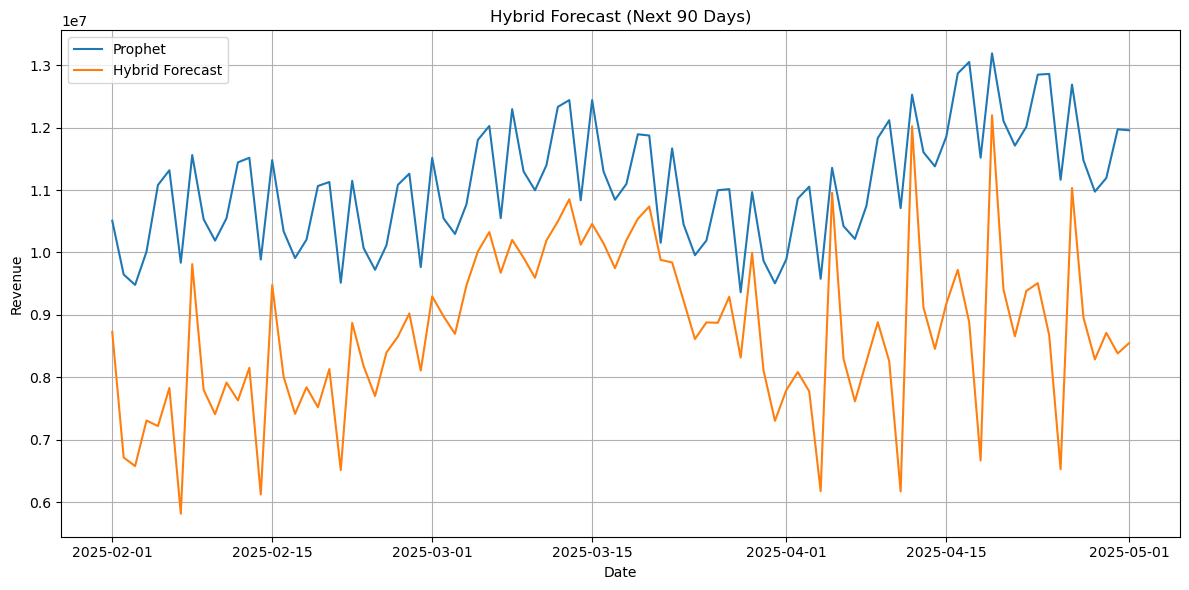

In [51]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Scale residuals
scaler = StandardScaler()
residual_scaled = scaler.fit_transform(df["residual"].fillna(0).values.reshape(-1, 1)).flatten()

# Step 2: Custom Dataset for LSTM
class ResidualDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X, self.y = [], []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# Step 3: DataLoader setup
dataset = ResidualDataset(residual_scaled)
train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Step 4: Define LSTM model
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.linear(out)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_lstm = LSTMForecast().to(device)

# Step 5: Train LSTM
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(50):
    model_lstm.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model_lstm(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# Step 6: Prophet forecast for next 90 days
future = prophet_model.make_future_dataframe(periods=90)
forecast_future = prophet_model.predict(future)
yhat_future = forecast_future[['ds', 'yhat']].tail(90).yhat.values

# Step 7: Generate 90 residuals with LSTM (looped)
input_seq = residual_scaled[-30:].tolist()
pred_residual_all = []

model_lstm.eval()
with torch.no_grad():
    for _ in range(13):  # 13 * 7 = 91
        input_tensor = torch.tensor(input_seq[-30:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model_lstm(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        input_seq.extend(pred)

# Cut to exactly 90 residuals
pred_residual_all = pred_residual_all[:90]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# Step 8: Combine forecasts
final_forecast = yhat_future + pred_residual_all
forecast_dates = forecast_future[['ds']].tail(90).ds.values

# Step 9: Display forecast
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_future,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast
})

print(hybrid_df.head())

plt.figure(figsize=(12, 6))
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast')
plt.legend()
plt.title("Hybrid Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get last 90 days of actuals and predictions from your training set
eval_days = 90
actuals = df['y'].values[-eval_days:]
prophet_pred = df['yhat'].values[-eval_days:]
residuals = df['residual'].values[-eval_days:]

# Use the trained LSTM to generate predicted residuals for these 90 days
# (Rebuild input from earlier residuals)
residual_scaled_eval = scaler.transform(residuals.reshape(-1, 1)).flatten()
input_seq = residual_scaled[-(30+eval_days):].tolist()  # enough padding

pred_residual_eval = []
model_lstm.eval()
with torch.no_grad():
    for i in range(0, eval_days, 7):
        input_tensor = torch.tensor(input_seq[i:i+30], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model_lstm(input_tensor).cpu().numpy().flatten()
        pred_residual_eval.extend(pred)

# Trim to match 90-day length
pred_residual_eval = pred_residual_eval[:eval_days]
pred_residual_eval = scaler.inverse_transform(np.array(pred_residual_eval).reshape(-1, 1)).flatten()

# Final hybrid forecast on historical data
hybrid_eval = prophet_pred + pred_residual_eval

# Metrics
mae = mean_absolute_error(actuals, hybrid_eval)
rmse = np.sqrt(mean_squared_error(actuals, hybrid_eval))
mape = np.mean(np.abs((actuals - hybrid_eval) / actuals)) * 100

print(f"Evaluation on last {eval_days} days:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Evaluation on last 90 days:
MAE: 2960024.91
RMSE: 3685929.76
MAPE: 55.85%


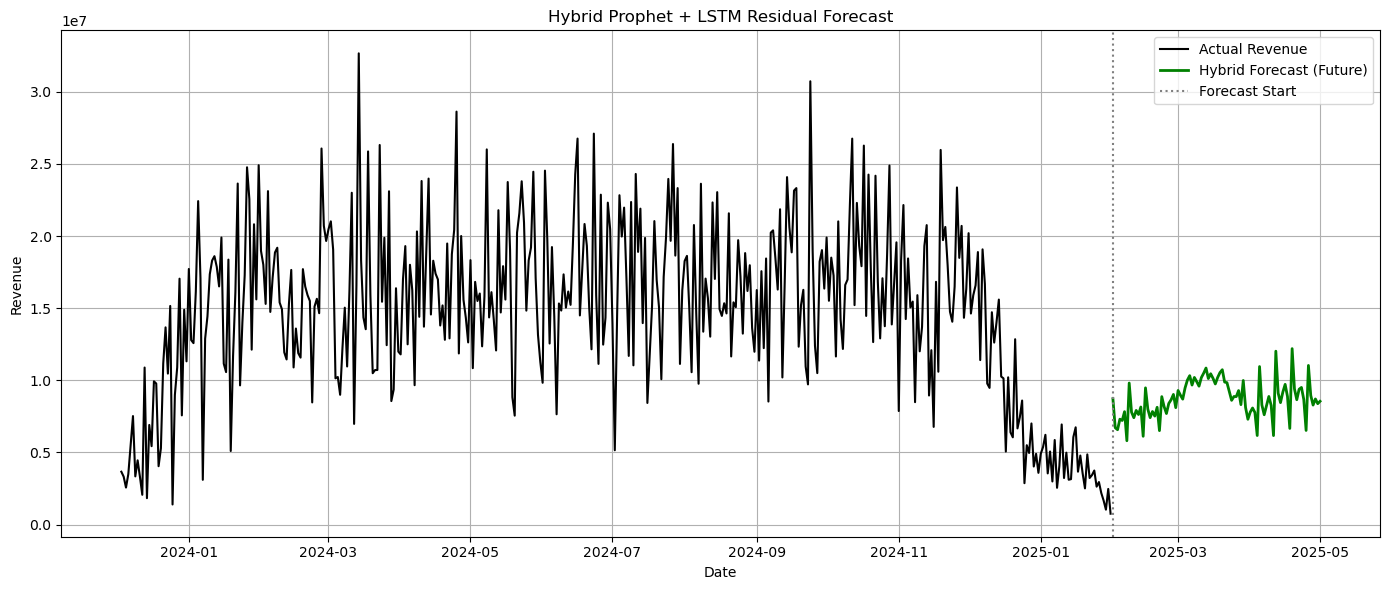

In [53]:
# Step 10: Merge with original df for full view
merged_df = pd.merge(forecast_future[['ds', 'yhat']], df[['ds', 'y']], on='ds', how='left')

# Append hybrid forecast to merged_df for plotting
hybrid_df_full = pd.DataFrame({
    'ds': forecast_dates,
    'hybrid': final_forecast
})
merged_df = pd.merge(merged_df, hybrid_df_full, on='ds', how='left')

# Step 11: Plot full timeline
plt.figure(figsize=(14, 6))

# Historical actuals
plt.plot(merged_df['ds'], merged_df['y'], label='Actual Revenue', color='black')

# Prophet forecast (fit + future)
#plt.plot(merged_df['ds'], merged_df['yhat'], label='Prophet Forecast', color='orange', linestyle='--')

# Hybrid forecast (future only)
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast (Future)', color='green', linewidth=2)

# Vertical line marking start of future forecast
forecast_start = hybrid_df['ds'].iloc[0]
plt.axvline(forecast_start, color='gray', linestyle=':', label='Forecast Start')

# Labels
plt.title("Hybrid Prophet + LSTM Residual Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


16:06:00 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 0.9533
Epoch 2: Loss 0.9385
Epoch 3: Loss 0.9324
Epoch 4: Loss 0.9406
Epoch 5: Loss 0.9512
Epoch 6: Loss 0.9330
Epoch 7: Loss 0.9397
Epoch 8: Loss 0.9420
Epoch 9: Loss 0.9306
Epoch 10: Loss 0.9350
Epoch 11: Loss 0.9274
Epoch 12: Loss 0.9517
Epoch 13: Loss 0.9429
Epoch 14: Loss 0.9344
Epoch 15: Loss 0.9478
Epoch 16: Loss 0.9513
Epoch 17: Loss 0.9318
Epoch 18: Loss 0.9302
Epoch 19: Loss 0.9420
Epoch 20: Loss 0.9391
Epoch 21: Loss 0.9312
Epoch 22: Loss 0.9423
Epoch 23: Loss 0.9482
Epoch 24: Loss 0.9192
Epoch 25: Loss 0.9090
Epoch 26: Loss 0.9142
Epoch 27: Loss 0.8830
Epoch 28: Loss 0.8672
Epoch 29: Loss 0.8640
Epoch 30: Loss 0.8544
Epoch 31: Loss 0.8499
Epoch 32: Loss 0.8541
Epoch 33: Loss 0.8379
Epoch 34: Loss 0.8344
Epoch 35: Loss 0.8152
Epoch 36: Loss 0.8203
Epoch 37: Loss 0.8015
Epoch 38: Loss 0.7930
Epoch 39: Loss 0.7961
Epoch 40: Loss 0.7972
Epoch 41: Loss 0.8140
Epoch 42: Loss 0.7810
Epoch 43: Loss 0.7717
Epoch 44: Loss 0.7746
Epoch 45: Loss 0.7713
Epoch 46: Loss 0.77

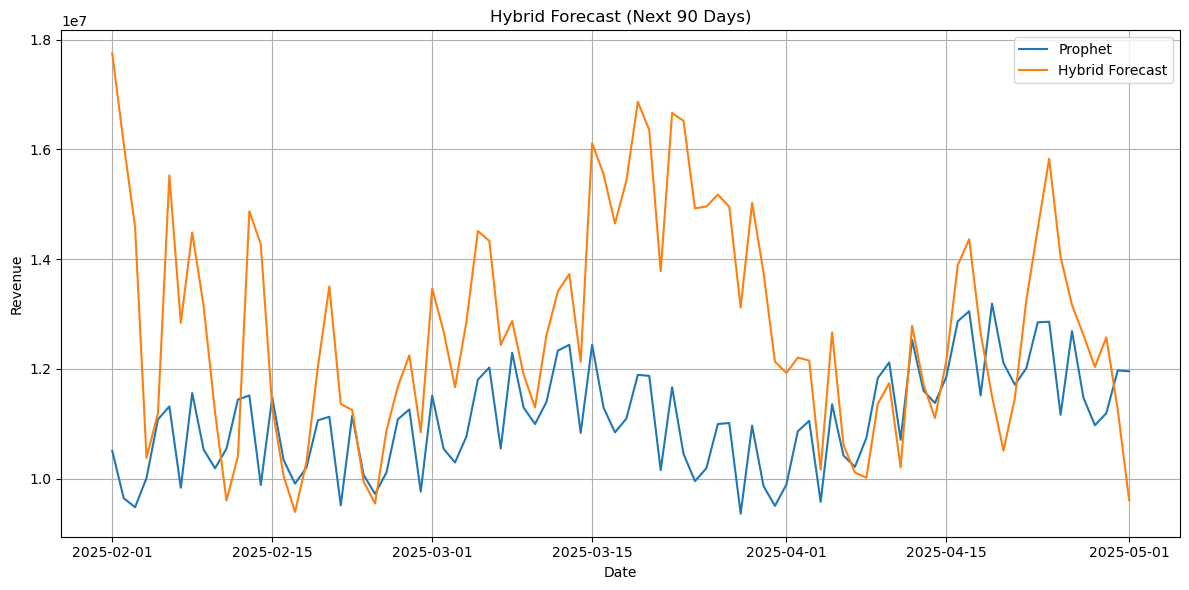

Evaluation on last 90 days:
MAE: 4752779.77
RMSE: 5853209.45
MAPE: 111.27%


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load and preprocess data ===
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# === Add Holidays (Optional) ===
holidays = pd.DataFrame({
    'holiday': 'year_end',
    'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
    'lower_window': 0,
    'upper_window': 2,
})

# === Fit Prophet Model ===
prophet_model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(df)

# === Forecast with Prophet and compute residuals ===
forecast = prophet_model.predict(df[['ds']])
df['yhat'] = forecast['yhat']
df['residual'] = df['y'] - df['yhat']

# === Scale residuals ===
scaler = StandardScaler()
df["residual_scaled"] = scaler.fit_transform(df["residual"].fillna(0).values.reshape(-1, 1)).flatten()

# === Define Dataset ===
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X, self.y = [], []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(self.y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# === Split into Train/Test ===
residual_series = df["residual_scaled"].values
input_len = 30
pred_len = 7
test_days = 90

cutoff = len(residual_series) - test_days
train_series = residual_series[:cutoff]
test_series = residual_series  # use full series so test inputs include past

train_dataset = RevenueDataset(train_series, input_len=input_len, pred_len=pred_len)
test_dataset = RevenueDataset(test_series, input_len=input_len, pred_len=pred_len)
test_dataset = torch.utils.data.Subset(test_dataset, list(range(len(test_dataset) - test_days // pred_len, len(test_dataset))))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32)

# === Define LSTM model ===
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# === Train LSTM ===
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(50):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# === Forecast next 90 days with Prophet ===
future = prophet_model.make_future_dataframe(periods=90)
forecast_future = prophet_model.predict(future)
yhat_future = forecast_future[['ds', 'yhat']].tail(90).yhat.values
forecast_dates = forecast_future[['ds']].tail(90).ds.values

# === Predict LSTM residuals for next 90 days ===
input_seq = df["residual_scaled"].values[-30:].tolist()
pred_residual_all = []

model.eval()
with torch.no_grad():
    for _ in range(13):  # 13*7 = 91
        input_tensor = torch.tensor(input_seq[-30:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        input_seq.extend(pred)

pred_residual_all = pred_residual_all[:90]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# === Final Hybrid Forecast ===
final_forecast = yhat_future + pred_residual_all
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_future,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast
})

# === Plot Forecast ===
plt.figure(figsize=(12, 6))
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast')
plt.legend()
plt.title("Hybrid Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Evaluation on Last 90 Days ===
actuals = df['y'].values[-90:]
prophet_pred = df['yhat'].values[-90:]
residuals = df['residual'].values[-90:]

# Reconstruct scaled input for eval
input_seq = df["residual_scaled"].values[-(30 + 90):].tolist()
pred_residual_eval = []

with torch.no_grad():
    for i in range(0, 90, 7):
        input_tensor = torch.tensor(input_seq[i:i+30], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_eval.extend(pred)

pred_residual_eval = pred_residual_eval[:90]
pred_residual_eval = scaler.inverse_transform(np.array(pred_residual_eval).reshape(-1, 1)).flatten()
hybrid_eval = prophet_pred + pred_residual_eval

mae = mean_absolute_error(actuals, hybrid_eval)
rmse = np.sqrt(mean_squared_error(actuals, hybrid_eval))
mape = np.mean(np.abs((actuals - hybrid_eval) / actuals)) * 100

print(f"Evaluation on last 90 days:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


16:06:03 - cmdstanpy - INFO - Chain [1] start processing
16:06:03 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 0.9194
Epoch 2: Loss 1.0367
Epoch 3: Loss 1.0372
Epoch 4: Loss 1.0450
Epoch 5: Loss 0.9422
Epoch 6: Loss 1.0082
Epoch 7: Loss 0.9135
Epoch 8: Loss 0.9515
Epoch 9: Loss 0.9867
Epoch 10: Loss 0.8841
Epoch 11: Loss 1.0471
Epoch 12: Loss 0.9507
Epoch 13: Loss 0.9543
Epoch 14: Loss 1.0156
Epoch 15: Loss 0.9438
Epoch 16: Loss 0.9993
Epoch 17: Loss 0.8563
Epoch 18: Loss 0.8732
Epoch 19: Loss 0.9040
Epoch 20: Loss 0.8524
Epoch 21: Loss 0.8211
Epoch 22: Loss 0.8837
Epoch 23: Loss 1.0294
Epoch 24: Loss 0.9115
Epoch 25: Loss 0.9451
Epoch 26: Loss 0.8388
Epoch 27: Loss 0.8342
Epoch 28: Loss 0.9280
Epoch 29: Loss 0.8179
Epoch 30: Loss 0.8544
Epoch 31: Loss 0.9441
Epoch 32: Loss 0.8734
Epoch 33: Loss 0.8769
Epoch 34: Loss 0.8400
Epoch 35: Loss 0.9148
Epoch 36: Loss 0.8414
Epoch 37: Loss 0.8576
Epoch 38: Loss 0.9059
Epoch 39: Loss 0.8638
Epoch 40: Loss 0.8479
Epoch 41: Loss 0.7825
Epoch 42: Loss 0.8390
Epoch 43: Loss 0.7942
Epoch 44: Loss 0.8616
Epoch 45: Loss 0.8655
Epoch 46: Loss 0.83

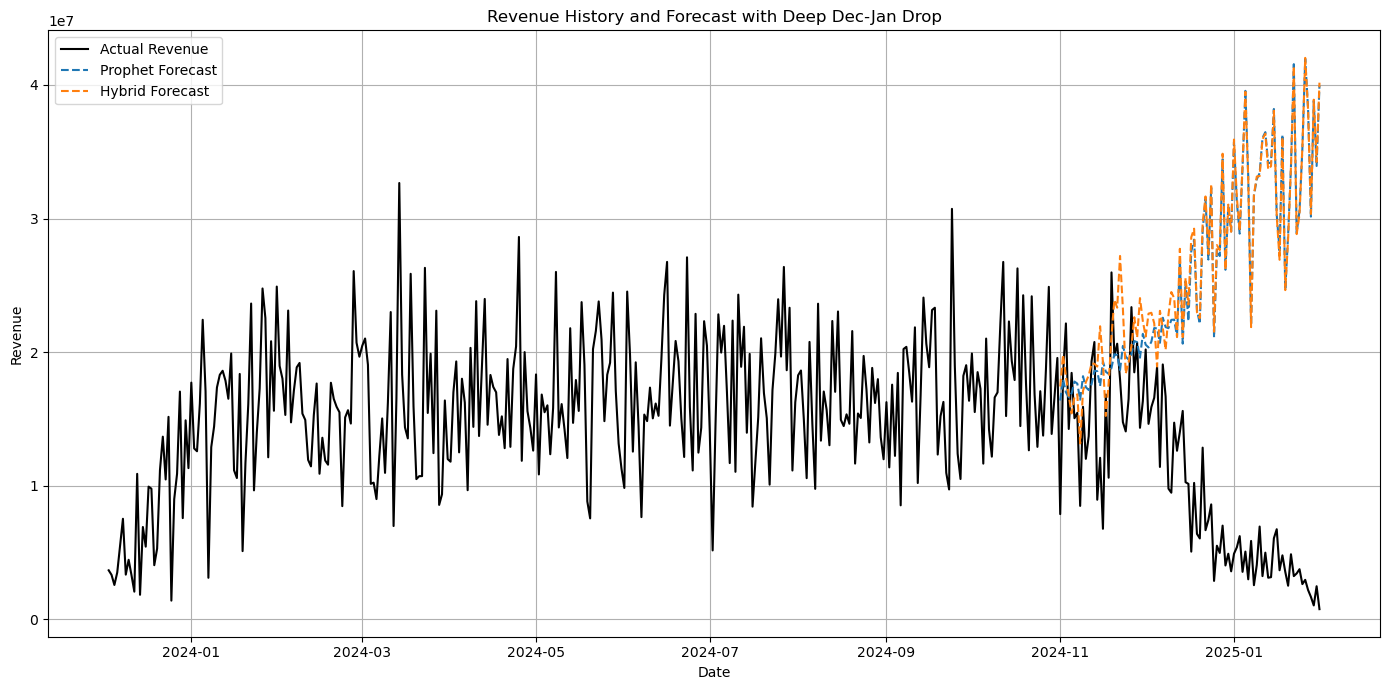


Evaluation on Test Set:
MAE: 16572515.69
RMSE: 20355854.23
MAPE: 449.99%


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import WeightedRandomSampler

# === Load and preprocess data ===
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# === Create strong holiday drop with two phases: Dec 10 - Dec 31 and Jan 1 - Feb 2 ===
drop_days = []
for year in range(2020, 2026):
    # Phase 1: Dec 10 - Dec 31
    drop_days.append({
        'holiday': 'dec_crash',
        'ds': pd.to_datetime(f'{year}-12-10'),
        'lower_window': 0,
        'upper_window': 21  # Dec 10 - Dec 31
    })
    # Phase 2: Jan 1 - Feb 2
    drop_days.append({
        'holiday': 'jan_crash',
        'ds': pd.to_datetime(f'{year}-01-01'),
        'lower_window': 0,
        'upper_window': 32  # Jan 1 - Feb 2
    })
drop_holidays = pd.DataFrame(drop_days)

# === Add time features for LSTM ===
df['dayofyear'] = df['ds'].dt.dayofyear / 365.0
df['month'] = df['ds'].dt.month / 12.0
df['day'] = df['ds'].dt.day / 31.0
df['month_day_interaction'] = df['month'] * df['day']  # New feature
df['is_jan_drop'] = (((df['ds'].dt.month == 12) & (df['ds'].dt.day >= 10)) | (df['ds'].dt.month == 1)).astype(int)

# === Split into train and test ===
split_date = pd.to_datetime("2024-11-01")
df_train = df[df['ds'] < split_date].copy()
df_test = df[df['ds'] >= split_date].copy()

# === Prophet model ===
df_train['cap'] = 4e7
prophet_model = Prophet(
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=drop_holidays,
    holidays_prior_scale=120  # Increased to emphasize drop effect
)
prophet_model.fit(df_train[['ds', 'y', 'cap']])

# === Forecast and residuals ===
forecast_train = prophet_model.predict(df_train[['ds', 'cap']])
df_train['yhat'] = forecast_train['yhat']
df_train['residual'] = df_train['y'] - df_train['yhat']
scaler = StandardScaler()
df_train['residual_scaled'] = scaler.fit_transform(df_train['residual'].values.reshape(-1, 1)).flatten()

# === Dataset with weights for Dec-Jan drop ===
class RevenueDataset(Dataset):
    def __init__(self, df, input_len=30, pred_len=7):
        series = df["residual_scaled"].values
        features = df[['dayofyear', 'month', 'day', 'month_day_interaction', 'is_jan_drop']].astype(float).values
        self.X, self.y, self.weights = [], [], []
        for i in range(len(series) - input_len - pred_len):
            x_seq = np.hstack([
                series[i:i+input_len].reshape(-1, 1),
                features[i:i+input_len]
            ])
            self.X.append(x_seq)
            self.y.append(series[i+input_len:i+input_len+pred_len])
            # Assign higher weight to Dec-Jan drop periods
            weight = 2.0 if np.any(features[i:i+input_len, -1] == 1) else 1.0
            self.weights.append(weight)
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)
        self.weights = torch.tensor(self.weights, dtype=torch.float32)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_dataset = RevenueDataset(df_train)
sampler = WeightedRandomSampler(train_dataset.weights, num_samples=len(train_dataset.weights), replacement=True)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)  # Use sampler instead of batch_sampler

# === LSTM model ===
class LSTMForecast(nn.Module):
    def __init__(self, input_size=6, hidden_size=64, num_layers=2, output_len=7):  # Increased input_size to 5
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# === Train LSTM ===
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
for epoch in range(100):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# === Prophet forecast ===
df_test['cap'] = 4e7
forecast_test = prophet_model.predict(df_test[['ds', 'cap']])
yhat_test = forecast_test['yhat'].values
forecast_dates = forecast_test['ds'].values

# === LSTM forecast ===
last_30 = df_train.tail(30).copy()
input_seq = np.hstack([
    last_30["residual_scaled"].values.reshape(-1, 1),
    last_30[['dayofyear', 'month', 'day', 'month_day_interaction', 'is_jan_drop']].astype(float).values
]).tolist()

pred_residual_all = []
model.eval()
with torch.no_grad():
    steps = (len(df_test) // 7) + 1
    for _ in range(steps):
        input_tensor = torch.tensor([input_seq[-30:]], dtype=torch.float32).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        for j in range(7):
            if len(input_seq) >= len(df_test) + 30:
                break
            idx = len(input_seq) - 30 + j
            if idx >= len(df_test): break
            row = df_test.iloc[idx]
            input_seq.append([0.0, row['dayofyear'], row['month'], row['day'], row['month'] * row['day'], row['is_jan_drop']])

pred_residual_all = pred_residual_all[:len(df_test)]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# === Final hybrid forecast ===
final_forecast = yhat_test + pred_residual_all
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_test,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast,
    'Actual': df_test['y'].values
})

# === Plot ===
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Actual Revenue', color='black')
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet Forecast', linestyle='--')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast', linestyle='--')
plt.legend()
plt.title("Revenue History and Forecast with Deep Dec-Jan Drop")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Evaluation ===
actuals = df_test['y'].values
mae = mean_absolute_error(actuals, final_forecast)
rmse = np.sqrt(mean_squared_error(actuals, final_forecast))
mape = np.mean(np.abs((actuals - final_forecast) / actuals)) * 100

print(f"\nEvaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")